In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
train_data_file = "~/data2.csv"
data = pd.read_csv(train_data_file)
features = data.drop(["Unnamed: 0", "eventID", "track_particle_key", "track_position_z", "track_ghostProbability"] , axis=1).astype(np.float64)

features.head()

,track_charge,track_chi2,track_chi2PerDoF,track_nLHCbIDs,track_p,track_phi,track_position_phi,track_position_r,track_position_x,track_position_y,track_pt,track_tx,track_ty,track_pseudoRapidity,particle_isDown,particle_isDown_noVelo
0,-1.0,6.275086,0.896441,12.0,2020.072174,2.849378,1.156534,7599.958646,494.515198,1124.644897,682.012956,-0.343474,0.103326,1.749189,1.0,0.0
1,-1.0,1.360128,0.194304,12.0,3841.771978,-3.082239,-3.011232,7578.755154,-1080.491943,-141.657471,1299.941130,-0.358948,-0.021330,1.746825,1.0,0.0
2,1.0,1.228229,0.204705,11.0,11831.335600,-0.011027,-0.021707,7503.689479,235.222702,-5.106698,1137.754221,0.096606,-0.001065,3.032522,0.0,0.0
3,-1.0,1.397992,0.349498,9.0,1982.935289,3.105371,2.717953,7505.289515,-256.822998,115.813004,803.347165,-0.442834,0.016047,1.552877,0.0,0.0
4,-1.0,1.731246,0.288541,11.0,6950.099982,-3.125277,-3.044312,7512.987296,-439.475525,-42.887833,1167.325690,-0.170356,-0.002780,2.470060,0.0,0.0


In [35]:
print(len(features))

157485


In [38]:
featuresTAll = features[(features.particle_isDown == 1) & (features.particle_isDown_noVelo == 0)].drop(["particle_isDown_noVelo", "particle_isDown"], axis = 1)
featuresFAll = features[(features.particle_isDown == 0)].drop(["particle_isDown_noVelo", "particle_isDown"], axis = 1)

if len(featuresTAll) < len(featuresFAll) :
    featuresT = featuresTAll
    featuresF = featuresFAll.sample(len(featuresT))
else:
    featuresT = featuresTAll.sample(len(featuresF))
    featuresF = featuresFAll

print(len(featuresTAll),len(featuresFAll))

88988 45988


In [5]:
def drawPlot(coll, binsnum, xmax = None, xmin = 0):
    T = featuresT[coll].values
    F = featuresF[coll].values
    if xmax != None:
        plt.hist(T, bins = binsnum, alpha=0.5, label='T', range = (xmin, xmax))
        plt.hist(F, bins = binsnum, alpha=0.5, label='F', range = (xmin, xmax))
    else:
        plt.hist(T, bins = binsnum, alpha=0.5, label='T')
        plt.hist(F, bins = binsnum, alpha=0.5, label='F')
    plt.legend(loc='upper right')
    plt.title(coll)
    plt.show()

In [6]:
featuresT.head(5)

,track_charge,track_chi2,track_chi2PerDoF,track_nLHCbIDs,track_p,track_phi,track_position_phi,track_position_r,track_position_x,track_position_y,track_pt,track_tx,track_ty,track_pseudoRapidity,particle_isDown
51,1.0,9.795560,1.632593,11.0,10435.038530,-0.967692,-1.697222,7533.204561,-89.084892,-700.881470,1159.610043,0.063424,-0.092092,2.887131,1.0
54,-1.0,4.108515,0.586931,12.0,3048.193672,3.098945,2.991682,7564.441325,-974.227478,147.150864,1154.348326,-0.408802,0.017445,1.626209,1.0
81,1.0,2.679403,0.382772,12.0,3247.641630,0.018973,0.085211,7529.146607,659.451050,56.328819,1031.584935,0.334930,0.006355,1.813744,1.0
82,-1.0,1.694528,0.282421,11.0,3307.302934,3.126251,3.089524,7583.350743,-1119.733521,58.355282,1242.110855,-0.405183,0.006217,1.635179,1.0
87,-1.0,1.243228,0.177604,12.0,2656.758174,3.110193,1.988466,7501.867569,-67.895752,152.994095,765.697081,-0.300830,0.009449,1.915778,1.0


In [7]:
featuresF.head(5)

,track_charge,track_chi2,track_chi2PerDoF,track_nLHCbIDs,track_p,track_phi,track_position_phi,track_position_r,track_position_x,track_position_y,track_pt,track_tx,track_ty,track_pseudoRapidity,particle_isDown
59643,1.0,9.587655,1.369665,12.0,25970.632245,-0.302944,-0.620018,7502.604740,160.886444,-114.862663,1358.483930,0.049995,-0.015627,3.643059,1.0
5930,1.0,1.495675,0.249279,11.0,15212.508819,0.252898,0.463829,7515.511777,431.624878,215.910248,1709.491675,0.109493,0.028296,2.875897,1.0
98685,-1.0,1.961287,0.326881,11.0,3650.510777,3.048201,2.990454,7515.277844,-473.498352,72.113640,987.183441,-0.279665,0.026194,1.982109,0.0
107594,1.0,3.312447,0.473207,12.0,5407.733878,-0.383617,-0.641921,7846.294837,1846.411499,-1380.256226,2253.172644,0.425024,-0.171545,1.522104,1.0
20062,1.0,6.298290,1.049715,11.0,18952.367921,0.561186,1.585557,7501.977827,-2.542572,172.234894,861.705409,0.038533,0.024222,3.783401,1.0


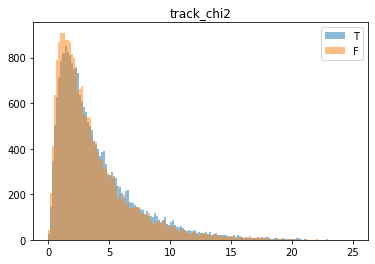

In [8]:
drawPlot("track_chi2", 150, 25)

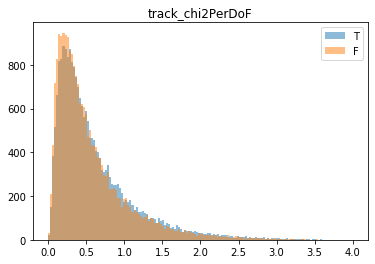

In [9]:
drawPlot("track_chi2PerDoF", 150 , 4)

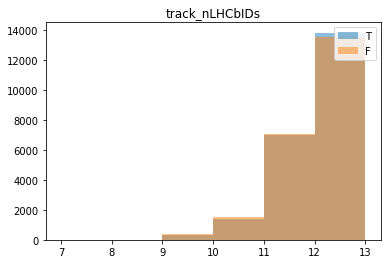

In [10]:
drawPlot("track_nLHCbIDs", 6, 13, 7)

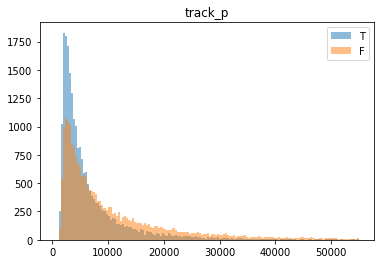

In [11]:
drawPlot("track_p", 150, 55000, 500)

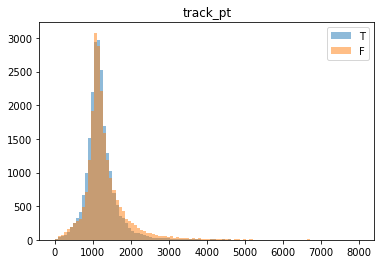

In [12]:
drawPlot("track_pt", 100, 8000)

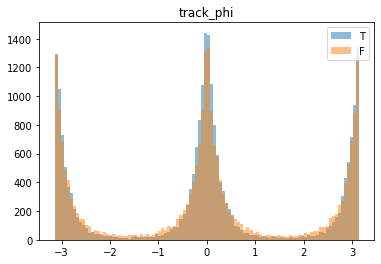

In [13]:
drawPlot("track_phi", 100)

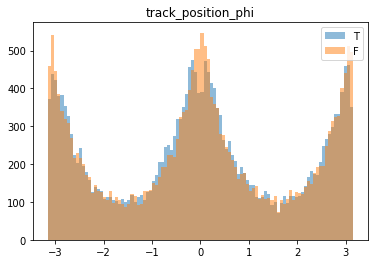

In [14]:
drawPlot("track_position_phi", 100)

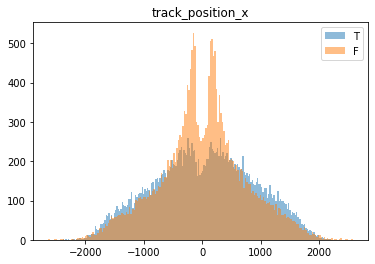

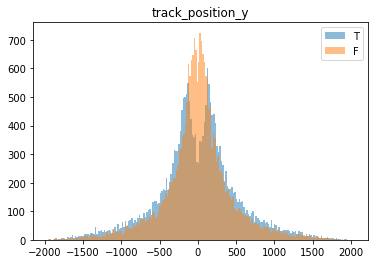

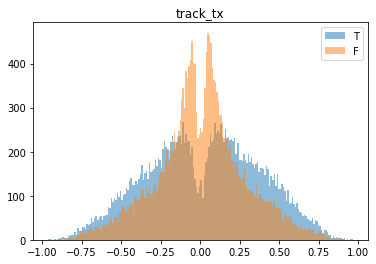

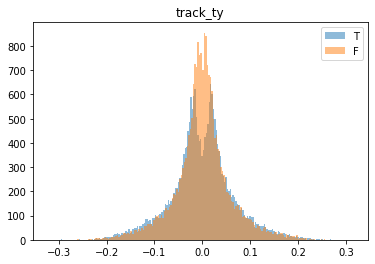

In [15]:
drawPlot("track_position_x", 200)
drawPlot("track_position_y", 200)
drawPlot("track_tx", 200)
drawPlot("track_ty", 200)

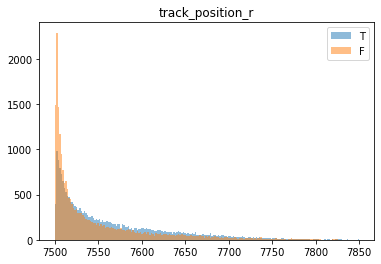

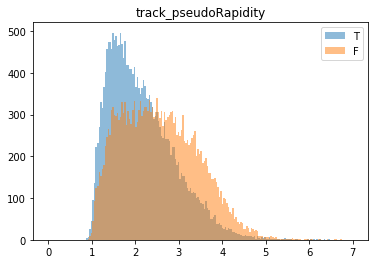

In [16]:
drawPlot("track_position_r", 200, 7850, 7500)
drawPlot("track_pseudoRapidity", 200, 7)

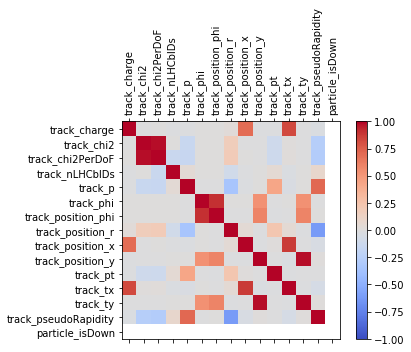

In [17]:
corr = featuresT.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(featuresT.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(featuresT.columns)
ax.set_yticklabels(featuresT.columns)
plt.show()

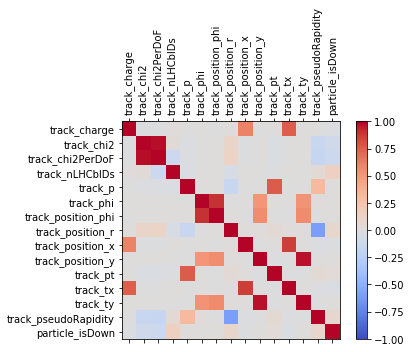

In [18]:
corr = featuresF.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(featuresF.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(featuresF.columns)
ax.set_yticklabels(featuresF.columns)
plt.show()